# Exercise 00: Line chart

In [6]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Make a connection to the database (it is the same as the previous day).

In [7]:
db_path = "../data/checking-logs.sqlite"
conn = sqlite3.connect(db_path)

In [8]:
pd.read_sql_query("PRAGMA table_info(pageviews);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,uid,TEXT,0,None,0
2,2,datetime,TIMESTAMP,0,None,0


In [9]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
for table_name in tables:
    table_name = table_name[0]
    print(f"\n--- Таблица: {table_name} ---")
    df = pd.read_sql_query(f"SELECT * FROM {table_name};", conn)
    print(df)


--- Таблица: pageviews ---
      index      uid                    datetime
0         0  admin_1  2020-04-17 12:01:08.463179
1         1  admin_1  2020-04-17 12:01:23.743946
2         2  admin_3  2020-04-17 12:17:39.287778
3         3  admin_3  2020-04-17 12:17:40.001768
4         4  admin_1  2020-04-17 12:27:30.646665
...     ...      ...                         ...
1075   1075  user_25  2020-05-21 23:23:49.995349
1076   1076  admin_1  2020-05-21 23:49:22.386789
1077   1077  admin_1  2020-05-22 10:36:14.662600
1078   1078   user_5  2020-05-22 11:30:18.368990
1079   1079  user_17  2020-05-22 18:22:22.847815

[1080 rows x 3 columns]

--- Таблица: checker ---
      index    status  success                   timestamp  numTrials  \
0         0  checking        0  2020-04-16 21:12:50.740474          5   
1         1     ready        0  2020-04-16 21:12:54.708365          5   
2         2  checking        0  2020-04-16 21:46:47.769088          7   
3         3     ready        0  2020-04-1

## Run a query that gets the datetime from the pageviews table, selecting only users and not admins.

In [10]:
query = """
    SELECT datetime
    FROM pageviews
    WHERE 
    uid LIKE 'user_%'
    """
df = pd.read_sql_query(query, conn)
df

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


## Using Pandas, create a new dataframe where the visits are counted and grouped by date.

In [11]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].dt.normalize()
visits = df.groupby('date').size().reset_index(name='visits')
visits

,date,visits
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1
5,2020-04-23,5
6,2020-04-25,1
7,2020-04-26,8
8,2020-04-28,2
9,2020-04-29,4


## Using the Pandas method .plot(), create a graph:
- The size of the font should be 8.
- The size of the figure is (15, 8).
- The graph must have the title "Views per Day".
- Notice the rotation of the xticks on the graph below.

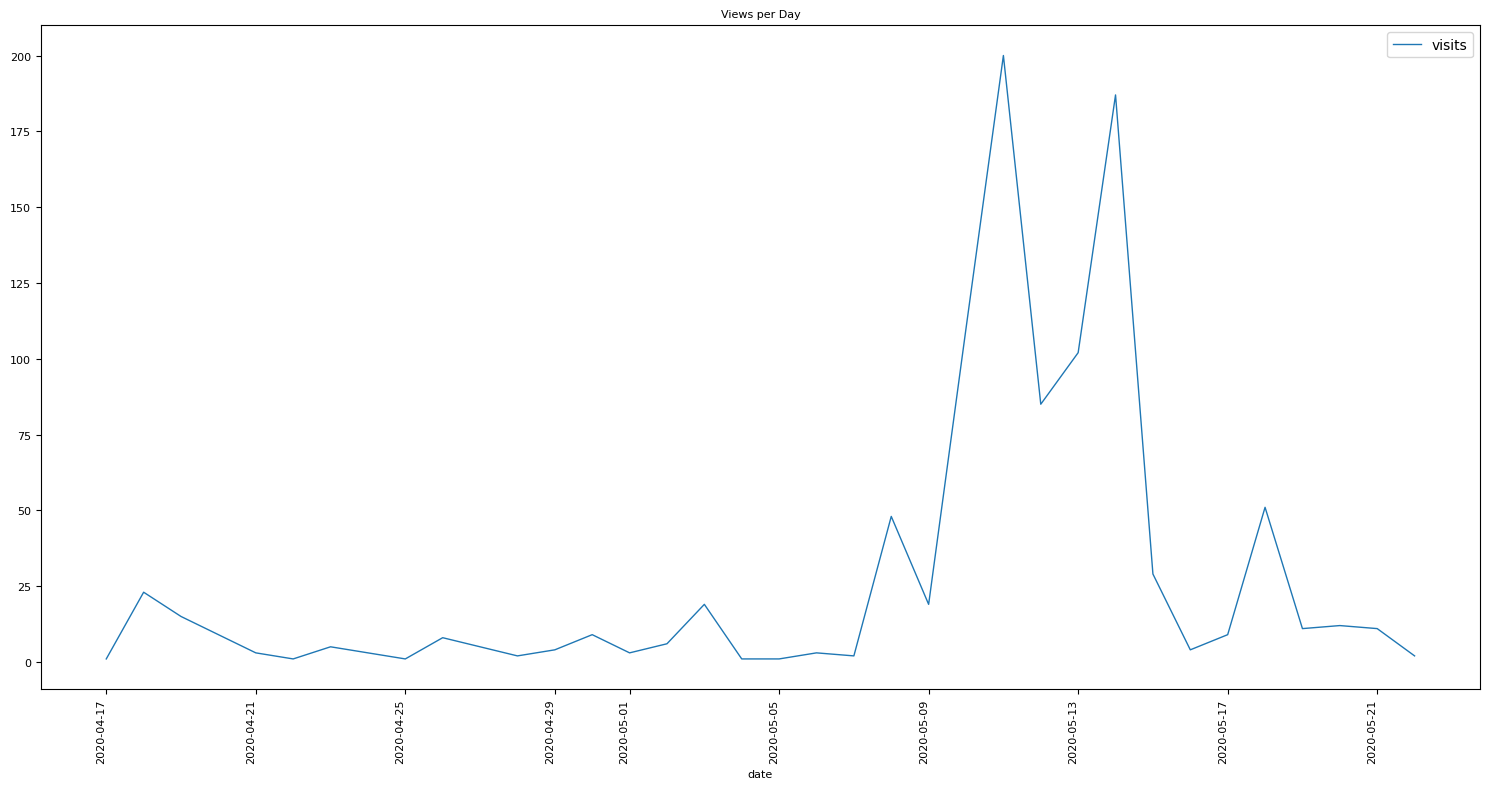

In [12]:
graph = visits.plot(
    x='date',   
    y='visits',
    figsize=(15, 8),
    linewidth=1,
    title="Views per Day"
)
graph.title.set_size(8)
graph.set_xlabel("date", fontsize=8)
graph.tick_params(axis='x', rotation=90, labelsize=8)
graph.tick_params(axis='y', labelsize=8)
plt.tight_layout()
plt.show()

## Close the connection to the database.

In [13]:
conn.close()